In [30]:
import pandas as pd
import numpy as np
import warnings
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings('ignore')

# import data
df=pd.read_csv('data/Kickstarter_projects.csv')
df.head(2)

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed


In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [3]:
# to do 
# create target variable 
# drop id, name
# create date columns
# create time dummies (years, months) 
# create time active column (Deadline date - Launched date)

In [39]:
#We define our categorical and numerical features and our target variables.
target = ['funded']
cat_features = ['Category', 'Subcategory', 'Country']
num_features = ['Goal', 'Pledged', 'Backers']

In [4]:
#We take an initial look at columns and datatypes. Launched and Deadline should be defined as datetime.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 11 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   ID           374853 non-null  int64 
 1   Name         374853 non-null  object
 2   Category     374853 non-null  object
 3   Subcategory  374853 non-null  object
 4   Country      374853 non-null  object
 5   Launched     374853 non-null  object
 6   Deadline     374853 non-null  object
 7   Goal         374853 non-null  int64 
 8   Pledged      374853 non-null  int64 
 9   Backers      374853 non-null  int64 
 10  State        374853 non-null  object
dtypes: int64(4), object(7)
memory usage: 31.5+ MB


In [5]:
#overall no duplicates
df.duplicated().value_counts()

False    374853
Name: count, dtype: int64

In [6]:
# checking for duplicates. No duplicate IDs
df['ID'].nunique()

374853

In [63]:
#We see some duplicate names. Repeat submissions or same names by chance?
unique = df['Name'].unique()
duplicated = df[df.duplicated(subset='Name', keep=False)]
df[duplicated]

ValueError: Boolean array expected for the condition, not object

In [41]:
# We describe the continuous data.
df[num_features].describe()

,Goal,Pledged,Backers
count,3.748530e+05,3.748530e+05,374853.000000
mean,4.586378e+04,9.121073e+03,106.690359
std,1.158778e+06,9.132054e+04,911.718520
min,0.000000e+00,0.000000e+00,0.000000
25%,2.000000e+03,3.100000e+01,2.000000
50%,5.500000e+03,6.250000e+02,12.000000
75%,1.600000e+04,4.051000e+03,57.000000
max,1.663614e+08,2.033899e+07,219382.000000


In [42]:
df[cat_features].describe()

,Category,Subcategory,Country
count,374853,374853,374853
unique,15,159,22
top,Film & Video,Product Design,United States
freq,62694,22310,292618


In [27]:
# We check the State column and convert it into successful 1 and  0 for all other categories (failed)
df[['Category', 'Subcategory', 'Country', 'State']].describe()

,Category,Subcategory,Country,State
count,374853,374853,374853,374853
unique,15,159,22,5
top,Film & Video,Product Design,United States,Failed
freq,62694,22310,292618,197611


In [14]:
df['funded'] = df['State'].apply(lambda x: 1 if x == 'Successful' else 0)

In [15]:
df['funded'].value_counts()

funded
0    241002
1    133851
Name: count, dtype: int64

In [31]:
# we convert Launched and Deadline to datetime.
df['Launched'] = pd.to_datetime(df['Launched'])
df['Deadline'] = pd.to_datetime(df['Deadline'])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 374853 entries, 0 to 374852
Data columns (total 12 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   ID           374853 non-null  int64         
 1   Name         374853 non-null  object        
 2   Category     374853 non-null  object        
 3   Subcategory  374853 non-null  object        
 4   Country      374853 non-null  object        
 5   Launched     374853 non-null  datetime64[ns]
 6   Deadline     374853 non-null  datetime64[ns]
 7   Goal         374853 non-null  int64         
 8   Pledged      374853 non-null  int64         
 9   Backers      374853 non-null  int64         
 10  State        374853 non-null  object        
 11  funded       374853 non-null  int64         
dtypes: datetime64[ns](2), int64(5), object(5)
memory usage: 34.3+ MB


In [49]:
#We create a time active column which is the the length of time in days between being Launched and the deadline.
df['time_active'] = (df['Deadline'] - df['Launched']).dt.days
df['time_active'] = df['time_active'].astype(int)
df['time_active'].describe()

count    374853.000000
mean         33.217192
std          12.804795
min           0.000000
25%          29.000000
50%          29.000000
75%          36.000000
max          91.000000
Name: time_active, dtype: float64

In [ ]:
# We drop all other columns we are not using 
#df = df.drop(columns=['ID', 'Name','Launched','Deadline', 'State', ])

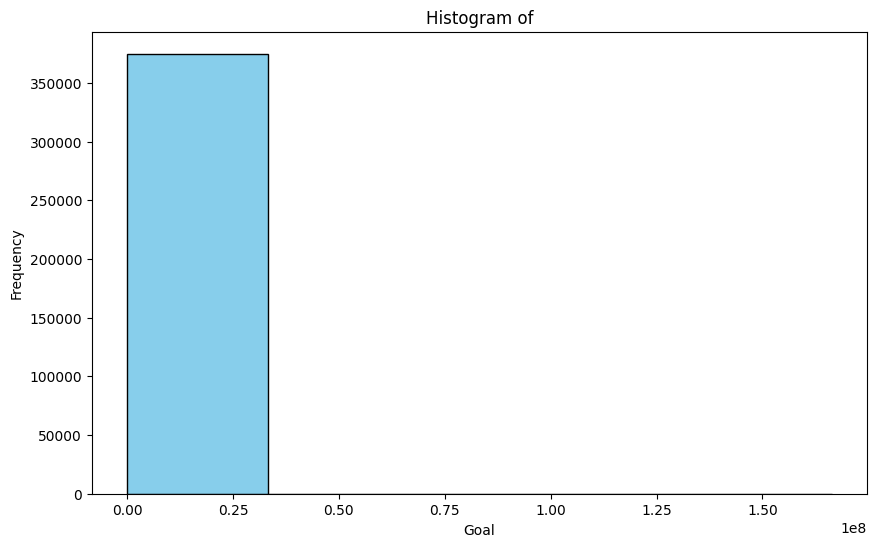

In [43]:

plt.figure(figsize=(10, 6))
plt.hist(df['Goal'], bins=5, color='skyblue', edgecolor='black')
plt.title(f'Histogram of')
plt.xlabel('Goal')
plt.ylabel('Frequency')
plt.show()

<Axes: xlabel='State', ylabel='count'>

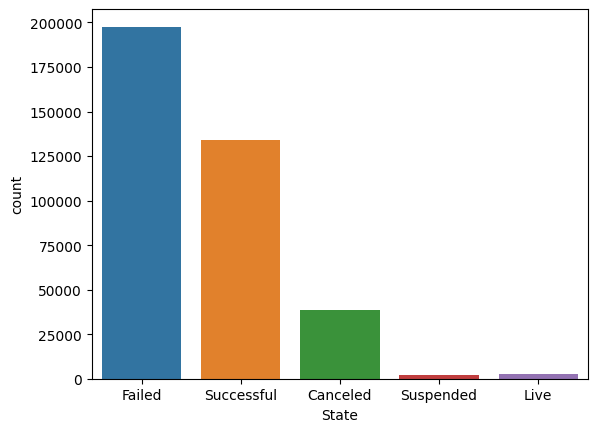

In [31]:
sns.countplot(df, x='State')

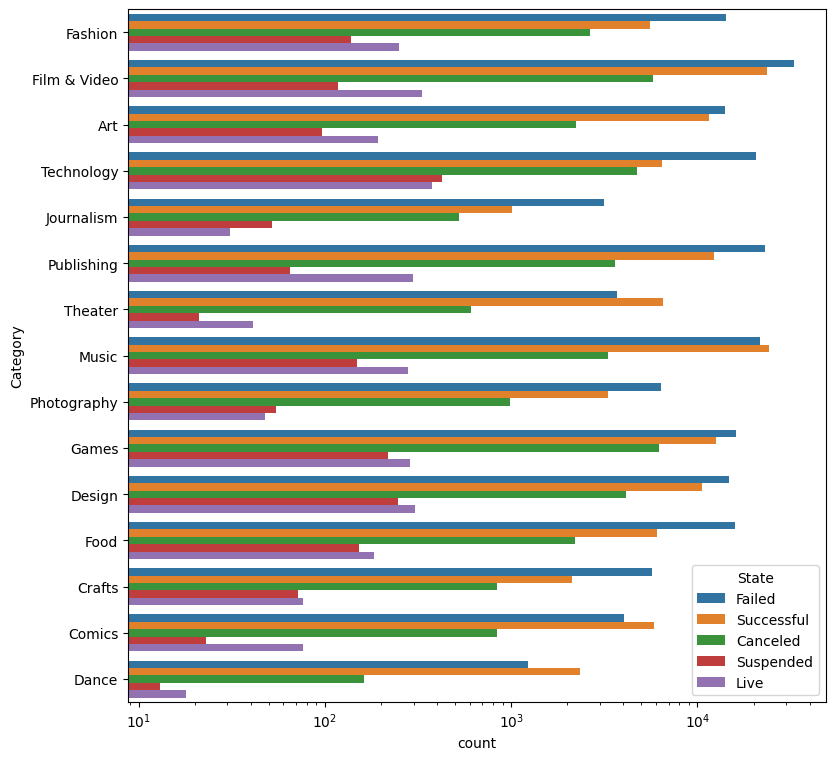

In [32]:
plt.figure(figsize=(9, 9))
sns.countplot(df, y='Category', hue='State')
plt.xscale('log')

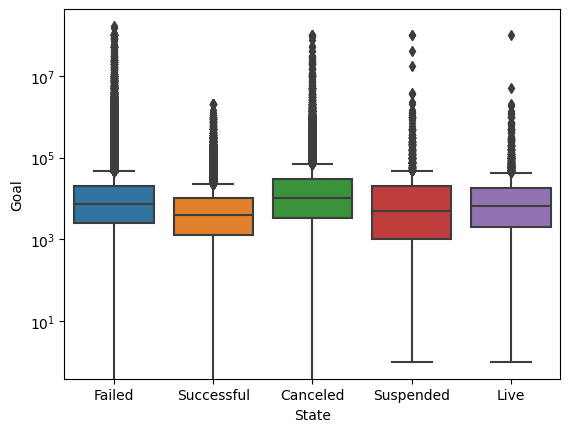

In [33]:
sns.boxplot(df, x='State', y='Goal')
plt.yscale('log')

<Axes: xlabel='Goal', ylabel='Category'>

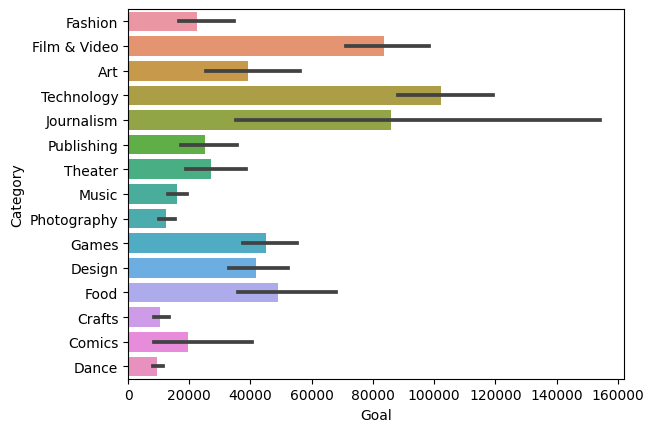

In [34]:
sns.barplot(df, y='Category', x='Goal')